In [ ]:
import pandas as pd

df = pd.read_csv('/content/MSFT.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-05-30,31.218750,32.062500,31.000000,31.687500,19.573532,68536400
1,2000-05-31,31.820313,31.851563,31.031250,31.281250,19.322592,54968200
2,2000-06-01,32.187500,33.000000,31.906250,32.281250,19.940296,94507200
3,2000-06-02,33.000000,33.375000,32.500000,33.156250,20.480793,80463200
4,2000-06-05,33.007813,34.187500,33.000000,33.437500,20.654518,64400000
...,...,...,...,...,...,...,...
6031,2024-05-20,420.209991,426.769989,419.989990,425.339996,425.339996,16272100
6032,2024-05-21,426.829987,432.970001,424.850006,429.040009,429.040009,21453300
6033,2024-05-22,430.089996,432.410004,427.130005,430.519989,430.519989,18073700
6034,2024-05-23,432.970001,433.600006,425.420013,427.000000,427.000000,17211700


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2000-05-30,31.687500
1,2000-05-31,31.281250
2,2000-06-01,32.281250
3,2000-06-02,33.156250
4,2000-06-05,33.437500
...,...,...
6031,2024-05-20,425.339996
6032,2024-05-21,429.040009
6033,2024-05-22,430.519989
6034,2024-05-23,427.000000


In [ ]:
df['Date']

0       2000-05-30
1       2000-05-31
2       2000-06-01
3       2000-06-02
4       2000-06-05
           ...    
6031    2024-05-20
6032    2024-05-21
6033    2024-05-22
6034    2024-05-23
6035    2024-05-24
Name: Date, Length: 6036, dtype: object

In [ ]:
import datetime

# Function to convert string date to datetime object
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

# Test the date conversion function
datetime_object = str_to_datetime('2000-05-30')
datetime_object

datetime.datetime(2000, 5, 30, 0, 0)

In [ ]:
df

,Date,Close
0,2000-05-30,31.687500
1,2000-05-31,31.281250
2,2000-06-01,32.281250
3,2000-06-02,33.156250
4,2000-06-05,33.437500
...,...,...
6031,2024-05-20,425.339996
6032,2024-05-21,429.040009
6033,2024-05-22,430.519989
6034,2024-05-23,427.000000


In [ ]:
# Apply the date conversion function to the 'Date' column
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2000-05-30
1      2000-05-31
2      2000-06-01
3      2000-06-02
4      2000-06-05
          ...    
6031   2024-05-20
6032   2024-05-21
6033   2024-05-22
6034   2024-05-23
6035   2024-05-24
Name: Date, Length: 6036, dtype: datetime64[ns]

In [ ]:
df

,Date,Close
0,2000-05-30,31.687500
1,2000-05-31,31.281250
2,2000-06-01,32.281250
3,2000-06-02,33.156250
4,2000-06-05,33.437500
...,...,...
6031,2024-05-20,425.339996
6032,2024-05-21,429.040009
6033,2024-05-22,430.519989
6034,2024-05-23,427.000000


In [ ]:
# Set the 'Date' column as the index
df.index = df.pop('Date')

In [ ]:
df

,Close
Date,
2000-05-30,31.687500
2000-05-31,31.281250
2000-06-01,32.281250
2000-06-02,33.156250
2000-06-05,33.437500
...,...
2024-05-20,425.339996
2024-05-21,429.040009
2024-05-22,430.519989


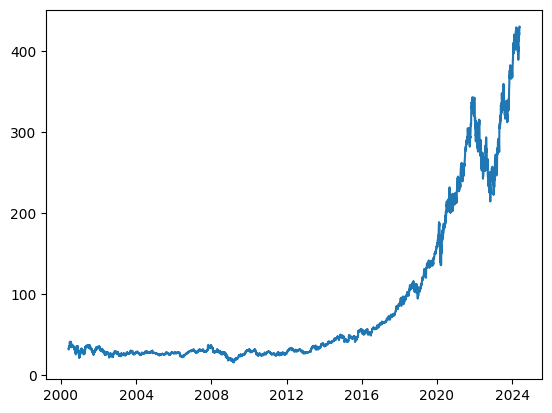

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

# Function to create a windowed dataframe for LSTM input
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Create a windowed dataframe from the original dataframe
# Start day second time around: '2023-05-31'
windowed_df = df_to_windowed_df(df,
                                '2023-05-31',
                                '2024-05-24',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-05-31,325.920013,332.890015,331.209991,328.390015
1,2023-06-01,332.890015,331.209991,328.390015,332.579987
2,2023-06-02,331.209991,328.390015,332.579987,335.399994
3,2023-06-05,328.390015,332.579987,335.399994,335.940002
4,2023-06-06,332.579987,335.399994,335.940002,333.679993
...,...,...,...,...,...
244,2024-05-20,423.079987,420.989990,420.209991,425.339996
245,2024-05-21,420.989990,420.209991,425.339996,429.040009
246,2024-05-22,420.209991,425.339996,429.040009,430.519989
247,2024-05-23,425.339996,429.040009,430.519989,427.000000


In [ ]:
# Function to reshape the windowed dataframe for LSTM input
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

# Transform the windowed dataframe to LSTM input format
dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

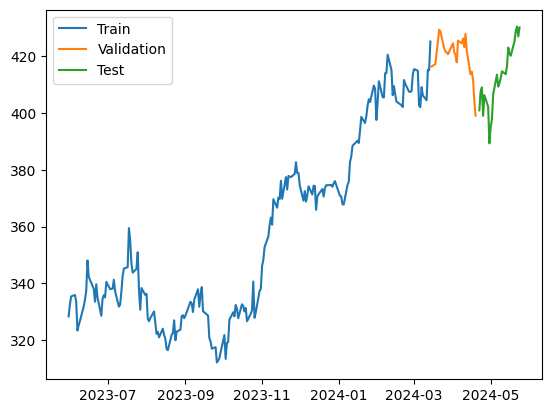

In [ ]:
# Split the data into training, validation, and test sets
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Plot the training, validation, and test data
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Define the LSTM model
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

# Compile the model
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 143ms/step - loss: 128665.9766 - mean_absolute_error: 357.2872 - val_loss: 176509.5469 - val_mean_absolute_error: 420.0713
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 128476.2188 - mean_absolute_error: 357.0209 - val_loss: 176354.5469 - val_mean_absolute_error: 419.8867
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 128343.5391 - mean_absolute_error: 356.8347 - val_loss: 176166.8750 - val_mean_absolute_error: 419.6632
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 128152.1719 - mean_absolute_error: 356.5674 - val_loss: 175901.4375 - val_mean_absolute_error: 419.3468
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 127917.4141 - mean_absolute_error: 356.2374 - val_loss: 175593.5938 - val_mean_absolute_error: 418.9796
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 127618.9609 - mean_absolute_error: 355.8171 - val_

7/7 [==============================] - 1s 3ms/step


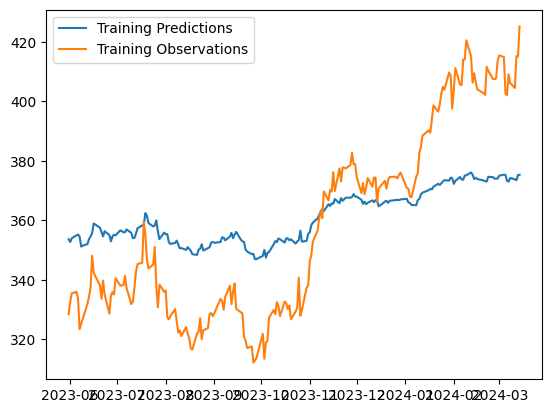

In [ ]:
# Predict on training data
train_predictions = model.predict(X_train).flatten()

# Plot training predictions vs actual values
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 23ms/step


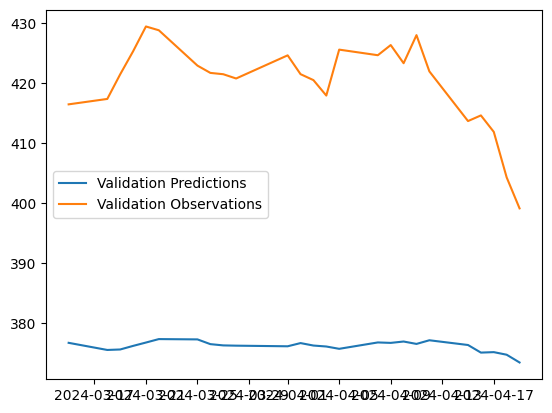

In [ ]:
# Predict on validation data
val_predictions = model.predict(X_val).flatten()

# Plot validation predictions vs actual values
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 20ms/step


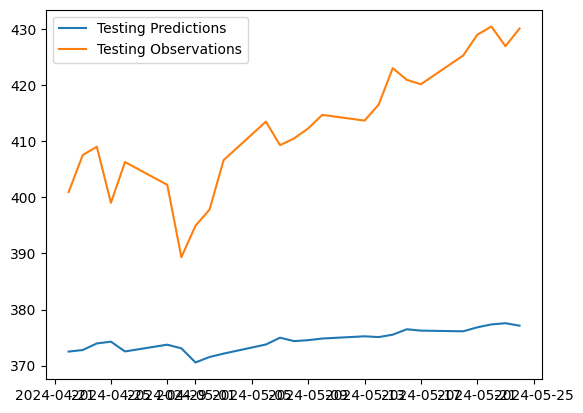

In [ ]:
# Predict on test data
test_predictions = model.predict(X_test).flatten()

# Plot test predictions vs actual values
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

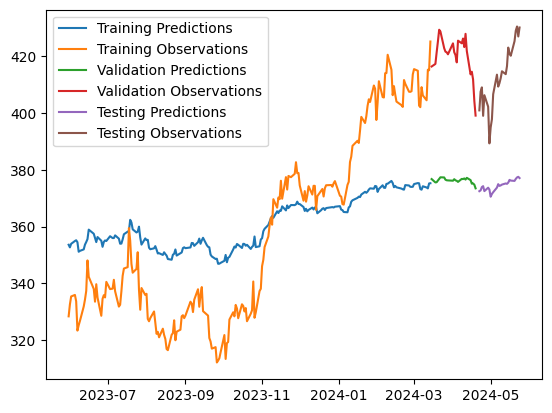

In [ ]:
# Plot all predictions together
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

# Generate recursive predictions
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


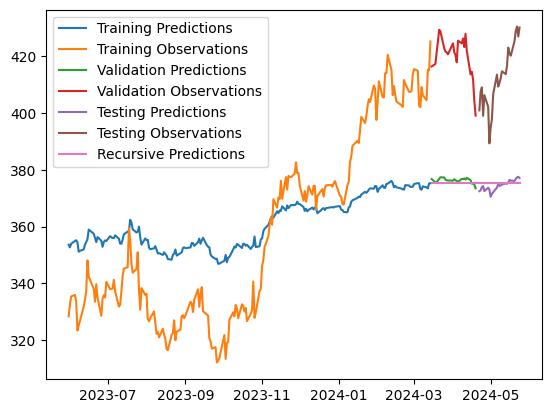

In [ ]:
# Plot recursive predictions
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])